# Processing OCCIPUT SSH Data
We have daily SSH data from OCCIPUT simulations saved on an external hard drive.
This notebook processes that data to estimate the variance of SSH for each year of simulation, and saves the data locally for further analysis.

**AH - 2 April 2019**

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import IPython.display
import pandas as pd
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
#from dask.distributed import Client, progress

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

In [2]:
HardDisk = '/Volumes/Untitled/'
EnsembleDir = 'SSH_ENSEMBLE_all/'

In [14]:
%%time
for ii in range(5,51):
    i00 = '%03d' % ii
    print('Now doing '+i00)

    Member = 'ORCA025.L75-OCCITENS.'+i00
    file = 'ORCA025.L75-OCCITENS.'+i00+'_y????.1d_SSH.nc'
    filename = HardDisk+EnsembleDir+Member+'-S/1d/'+file
# I would prefer to use this method, but lat/lon  variables vary with time!!!
#    ssh = xr.open_mfdataset(filename,coords='minimal').ssh.drop('time_centered')
# Instead, use this one and just store as a function of x and y.
    ssh = xr.open_mfdataset(filename).ssh.drop('time_centered').drop('nav_lat').drop('nav_lon')
    print('Opened '+filename)

    ssh_annual_mean = ssh.groupby('time_counter.year').mean('time_counter')#.load()
    ssh_squared = ssh**2
    ssh_squared_mean = ssh_squared.groupby('time_counter.year').mean('time_counter')#.load()
    ssh_var = ssh_squared_mean - ssh_annual_mean**2
    
    ssh_var.load()
    ssh_var.rename('ssh_var').to_netcdf('Data/'+Member+'_ssh_var.nc')

Now doing 005
Opened /Volumes/Untitled/SSH_ENSEMBLE_all/ORCA025.L75-OCCITENS.005-S/1d/ORCA025.L75-OCCITENS.005_y????.1d_SSH.nc
Now doing 006
Opened /Volumes/Untitled/SSH_ENSEMBLE_all/ORCA025.L75-OCCITENS.006-S/1d/ORCA025.L75-OCCITENS.006_y????.1d_SSH.nc
Now doing 007
Opened /Volumes/Untitled/SSH_ENSEMBLE_all/ORCA025.L75-OCCITENS.007-S/1d/ORCA025.L75-OCCITENS.007_y????.1d_SSH.nc
Now doing 008
Opened /Volumes/Untitled/SSH_ENSEMBLE_all/ORCA025.L75-OCCITENS.008-S/1d/ORCA025.L75-OCCITENS.008_y????.1d_SSH.nc
Now doing 009
Opened /Volumes/Untitled/SSH_ENSEMBLE_all/ORCA025.L75-OCCITENS.009-S/1d/ORCA025.L75-OCCITENS.009_y????.1d_SSH.nc
Now doing 010
Opened /Volumes/Untitled/SSH_ENSEMBLE_all/ORCA025.L75-OCCITENS.010-S/1d/ORCA025.L75-OCCITENS.010_y????.1d_SSH.nc
Now doing 011
Opened /Volumes/Untitled/SSH_ENSEMBLE_all/ORCA025.L75-OCCITENS.011-S/1d/ORCA025.L75-OCCITENS.011_y????.1d_SSH.nc
Now doing 012
Opened /Volumes/Untitled/SSH_ENSEMBLE_all/ORCA025.L75-OCCITENS.012-S/1d/ORCA025.L75-OCCITENS.012_

## Errors in filenames
See figures below for a demonstration that coordinates vary in this model output.

In [2]:
filename='/Volumes/Untitled/SSH_ENSEMBLE_all/ORCA025.L75-OCCITENS.002-S/1d/ORCA025.L75-OCCITENS.002_y2004.1d_SSH.nc'
ssh1 = xr.open_mfdataset(filename).ssh.drop('time_centered')

filename='/Volumes/Untitled/SSH_ENSEMBLE_all/ORCA025.L75-OCCITENS.002-S/1d/ORCA025.L75-OCCITENS.002_y2005.1d_SSH.nc'
ssh2 = xr.open_mfdataset(filename).ssh.drop('time_centered')


Text(0.5,1,'difference')

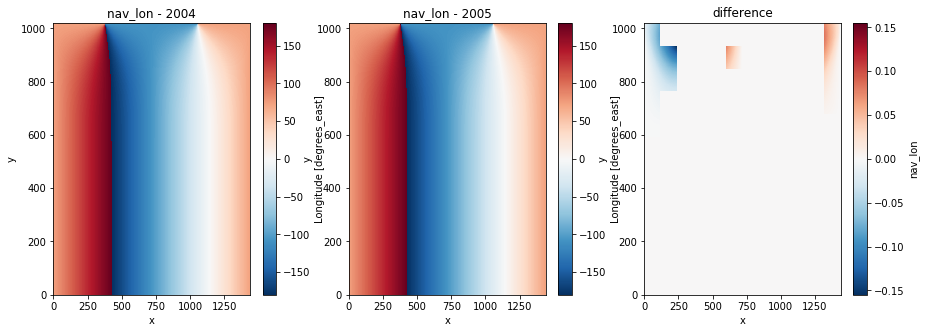

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(131)
ssh1.nav_lon.plot()
plt.title('nav_lon - 2004')

plt.subplot(132)
ssh2.nav_lon.plot()
plt.title('nav_lon - 2005')

plt.subplot(133)
temp = ssh2.nav_lon - ssh1.nav_lon
temp.plot()
plt.title('difference')

Text(0.5,1,'difference')

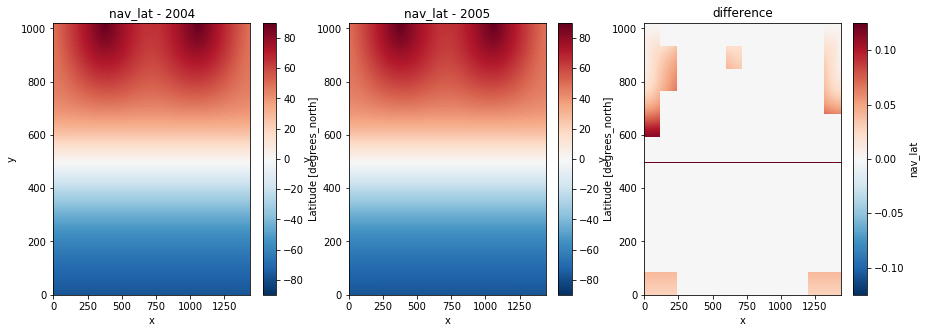

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(131)
ssh1.nav_lat.plot()
plt.title('nav_lat - 2004')

plt.subplot(132)
ssh2.nav_lat.plot()
plt.title('nav_lat - 2005')

plt.subplot(133)
temp = ssh2.nav_lat - ssh1.nav_lat
temp.plot()
plt.title('difference')

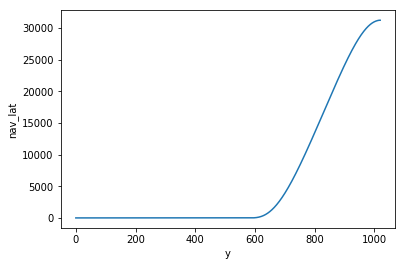

In [28]:
temp = ssh1.nav_lat - ssh1.nav_lat[:,0]
temp.sum('x').plot()

In [30]:
ssh1.nav_lat[600,0].values

array(24.66832160949707, dtype=float32)

In [6]:
ssh1.nav_lat.values[150:310,0]

array([-65.28856659, -65.18385315, -65.07871246, -64.97315979,
       -64.86719513, -64.76080322, -64.6539917 , -64.54676056,
       -64.43910217, -64.33102417, -64.22251892, -64.11358643,
       -64.00422668, -63.89443588, -63.78421021, -63.67355728,
       -63.56246948, -63.45094681, -63.33898544, -63.2265892 ,
       -63.11375427, -63.00048065, -62.88676071, -62.77260208,
       -62.65800095, -62.54295349, -62.42745972, -62.31151581,
       -62.19512558, -62.07828522, -61.96099472, -61.84325027,
       -61.72504807, -61.60639572, -61.48728561, -61.36771774,
       -61.24769211, -61.1272049 , -61.00625992, -60.88484955,
       -60.76297379, -60.64063644, -60.51783371, -60.39456177,
       -60.27082062, -60.14661026, -60.02192688, -59.89677429,
       -59.77114868, -59.64504623, -59.51847076, -59.39141464,
       -59.2638855 , -59.13587189, -59.00738144, -58.87841034,
       -58.74895477, -58.61901474, -58.48859024, -58.35768127,
       -58.22628403, -58.09439468, -57.96202087, -57.82